In [1]:
'''https://github.com/Caesar73/gitchatcamp/p1'''

'https://github.com/Caesar73/gitchatcamp/p1'

In [2]:
import time

import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

from hmmlearn import hmm
from sklearn.preprocessing import scale

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# 导入 Stock 数据
data = pd.read_csv("../input/msft_stockprices_dataset.csv")

data.head()

,Date,High Price,Low Price,Open Price,Close Price,Volume
0,2014-09-09 00:00:00,46.970001,46.419998,46.470001,46.759998,40302400.0
1,2014-09-10 00:00:00,46.939999,46.279999,46.820000,46.840000,27302400.0
2,2014-09-11 00:00:00,47.000000,46.470001,46.740002,47.000000,29216400.0
3,2014-09-12 00:00:00,47.020000,46.599998,46.910000,46.700001,38244700.0
4,2014-09-15 00:00:00,46.709999,46.099998,46.540001,46.240002,37667600.0


In [4]:
# 取出各列数据
dates  = data['Date']
highp  = data['High Price']
lowp   = data['Low Price']
openp  = data['Open Price']
closep = data['Close Price']
volume = data['Volume']

In [5]:
# 价格波动
diff = np.log(openp) - np.log(closep)
diff.head()

0   -0.006221
1   -0.000427
2   -0.005547
3    0.004487
4    0.006467
dtype: float64

In [6]:
'''
scale 归一化处理
将波动价格和交易数组成输入数据

'''

X = np.column_stack([scale(diff), scale(volume)])
X

array([[-0.51164405,  0.68249084],
       [ 0.01063822, -0.17003453],
       [-0.45089836, -0.04451656],
       ...,
       [-0.35797074, -0.42086061],
       [ 0.06579875, -0.48506233],
       [-0.39698633, -0.60118284]])

In [7]:
# 训练高斯HMM模型，这里假设隐藏状态4个

start = time.time()
model = hmm.GaussianHMM(n_components= 4, covariance_type="full", n_iter=2000)
model = model.fit(X)
end = time.time() - start
end

0.5499279499053955

In [8]:
model

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=2000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [9]:
# 预测隐状态

hidden_states = model.predict(X)

hidden_states

array([1, 0, 0, ..., 0, 0, 0])

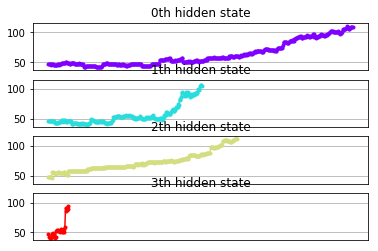

In [10]:
# 预测走势图
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], closep[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()